# Project CZ 1015

## Datasets : What's Cooking
#### The datasets was taken from Kaggle

##### Main objectives of this project : To predict the cuisine based on the ingredients provided using

In [1]:
#Importing the Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json  

In [2]:
data = pd.read_json('train.json')
data.head() 

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
data.shape

(39774, 3)

In [4]:
#To check whether there are duplicates or not
data=data.drop_duplicates(subset='id', keep='first')
data.shape
#Based on the data shape, we can conclude there is no duplicate.

(39774, 3)

In [5]:
data.isnull().sum() #to check whether there is a missing data or not

cuisine        0
id             0
ingredients    0
dtype: int64

# Let's Do Some Data Exploration 

In [6]:
# To count the number of unique ingredients inside the dataset
print("Number of cuisine categories: {}".format(len(data['cuisine'].unique())))
data['cuisine'].unique()

Number of cuisine categories: 20


array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [7]:
import random
def random_colours(total_colour):
    random_colors = []
    for i in range(total_colour):
        random_colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return random_colors

In [8]:
#Find how many dishes are there for each cuisine
cuisine_data = data['cuisine'].value_counts()
cuisine_data

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [9]:
type(cuisine_data)

pandas.core.series.Series

In [10]:
cuisine_data = cuisine_data.to_frame().reset_index()
cuisine_data = cuisine_data.rename(columns= {'cuisine': 'Total'})
cuisine_data = cuisine_data.rename(columns= {'index': 'Cuisine'})
cuisine_data.head()

,Cuisine,Total
0,italian,7838
1,mexican,6438
2,southern_us,4320
3,indian,3003
4,chinese,2673


In [11]:
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly import tools

In [12]:
# Activate inline plotting in notebook
py.init_notebook_mode(connected = True)

In [13]:
picture = [go.Bar(
            x=cuisine_data['Cuisine'],
            y= cuisine_data['Total'],
            marker = dict(color = random_colours(20))
    )]

layout = go.Layout(
    title='Number of Dishes for Each Cuisine',
)

fig = go.Figure(data=picture, layout=layout)
py.iplot(fig, filename='basic-bar')

In [14]:
labels = cuisine_data['Cuisine']
values = cuisine_data['Total']

trace = go.Pie(labels=labels, values=values)

layout = go.Layout(
    title='Percentage of The Cuisine',
)

fig = go.Figure(data=[trace], layout=layout)

py.iplot(fig, filename='basic_pie_chart')

In [15]:
data['ingredients2'] = data['ingredients'].apply(lambda x: [y.replace(' ','') for y in x])

In [16]:
data['ingredients2'] = data['ingredients2'].apply(lambda x: ",".join(x))

In [17]:
data.head()

,cuisine,id,ingredients,ingredients2
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romainelettuce,blackolives,grapetomatoes,garli..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plainflour,groundpepper,salt,tomatoes,groundbl..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs,pepper,salt,mayonaise,cookingoil,greenchi..."
3,indian,22213,"[water, vegetable oil, wheat, salt]","water,vegetableoil,wheat,salt"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","blackpepper,shallots,cornflour,cayennepepper,o..."


In [18]:
ingredients = input("Please enter the ingredients ")
ingredients = ingredients.replace(" ","").lower()

Please enter the ingredients salt


In [19]:
indices = data['ingredients2'].str.contains(ingredients)
ingredients_data = data[indices]['cuisine'].value_counts()
ingredients_df = ingredients_data.to_frame().reset_index()
ingredients_df = ingredients_df.rename(columns= {'cuisine': 'Total'})
ingredients_df = ingredients_df.rename(columns= {'index': 'Cuisine'})

In [20]:
picture = [go.Bar(
            x=ingredients_df['Cuisine'],
            y=ingredients_df['Total'],
    marker = dict(color = random_colours(20))
    )]

layout = go.Layout(
    title= ingredients + ' in Each Cuisine',
)

fig = go.Figure(data=picture, layout=layout)
py.iplot(fig, filename='basic-bar')

## Let's Take A Look For The Comparison Of Multiple Ingredients For Each Cuisine !

In [21]:
ingredients_1 = input("Please enter the ingredients 1 ")
ingredients_1 = ingredients_1.replace(" ","").lower()
ingredients_2 = input("Please enter the ingredients 2 ")
ingredients_2 = ingredients_2.replace(" ","").lower()

Please enter the ingredients 1 salt
Please enter the ingredients 2 blackpepper


In [22]:
indices_1 = data['ingredients2'].str.contains(ingredients_1)
ingredients_data_1 = data[indices_1]['cuisine'].value_counts()
ingredients_df_1 = ingredients_data_1.to_frame().reset_index()
ingredients_df_1 = ingredients_df_1.rename(columns= {'cuisine': 'Total'})
ingredients_df_1 = ingredients_df_1.rename(columns= {'index': 'Cuisine'})

indices_2 = data['ingredients2'].str.contains(ingredients_2)
ingredients_data_2 = data[indices_2]['cuisine'].value_counts()
ingredients_df_2 = ingredients_data_2.to_frame().reset_index()
ingredients_df_2 = ingredients_df_2.rename(columns= {'cuisine': 'Total'})
ingredients_df_2 = ingredients_df_2.rename(columns= {'index': 'Cuisine'})

In [23]:
trace1 = go.Bar(
    x=ingredients_df_1['Cuisine'],
    y=ingredients_df_1['Total'],
    name=ingredients_1
)
trace2 = go.Bar(
    x=ingredients_df_2['Cuisine'],
    y=ingredients_df_2['Total'],
    name=ingredients_2
)

graph = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title = ingredients_1 + ' vs ' + ingredients_2 + ' for Each Cuisine'
)

fig = go.Figure(data=graph, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [24]:
def findnumingr(cuisine):
    list_ingredient = []
    for ingredients in data[data['cuisine'] == cuisine]['ingredients']:
        for item in ingredients:
            list_ingredient.append(item)
    result = (cuisine,len(list(set(list_ingredient))))         
    return result 

In [25]:
cuisine = []
for i in labels:
    cuisine.append(findnumingr(i))

In [26]:
cuisine

[('italian', 2929),
 ('mexican', 2684),
 ('southern_us', 2462),
 ('indian', 1664),
 ('chinese', 1792),
 ('french', 2102),
 ('cajun_creole', 1576),
 ('thai', 1376),
 ('japanese', 1439),
 ('greek', 1198),
 ('spanish', 1263),
 ('korean', 898),
 ('vietnamese', 1108),
 ('moroccan', 974),
 ('british', 1166),
 ('filipino', 947),
 ('irish', 999),
 ('jamaican', 877),
 ('russian', 872),
 ('brazilian', 853)]

In [27]:
trace = go.Bar(
            x=[i[1] for i in cuisine],
            y= [i[0] for i in cuisine],
            orientation = 'h',marker = dict(color = random_colours(20),
))
layout = go.Layout(
    xaxis = dict(title= 'Count of different ingredients', ),
    title= 'Number of all the different ingredients used in a given cuisine', titlefont = dict(size = 20),
    width=800, height=500, 
)
unique_data = [trace]
fig = go.Figure(data=unique_data, layout=layout)
py.iplot(fig, filename='horizontal-bar')

In [28]:
print('Maximum Number of Ingredients in a Dish: ',data['ingredients'].str.len().max())
print('Minimum Number of Ingredients in a Dish: ',data['ingredients'].str.len().min())

Maximum Number of Ingredients in a Dish:  65
Minimum Number of Ingredients in a Dish:  1


In [29]:
maximum = data[data['ingredients'].str.len() == 65]
maximum.head()

,cuisine,id,ingredients,ingredients2
15289,italian,3885,"[fettucine, fresh marjoram, minced garlic, oli...","fettucine,freshmarjoram,mincedgarlic,oliveoil,..."


#### Only one dish contains 65 ingredients, and that dish comes from italian cuisine.
#### Then how about the dish that contains a lot of ingredients? Let us consider the dish that contains more than 25 ingredients

In [30]:
many_recipes = data[data['ingredients'].str.len()>25]
many_recipes.head()

,cuisine,id,ingredients,ingredients2
294,filipino,9829,"[sugar, fresh cilantro, hoisin sauce, butter, ...","sugar,freshcilantro,hoisinsauce,butter,crushed..."
345,thai,45039,"[fish sauce, hot red pepper flakes, cider vine...","fishsauce,hotredpepperflakes,cidervinegar,chil..."
783,mexican,11058,"[tomatoes, black pepper, tortillas, Mexican or...","tomatoes,blackpepper,tortillas,Mexicanoregano,..."
795,greek,20364,"[eggs, pepper, coarse salt, purple onion, feta...","eggs,pepper,coarsesalt,purpleonion,fetacheesec..."
1373,indian,25479,"[curry leaves, chiles, coriander seeds, bonele...","curryleaves,chiles,corianderseeds,bonelessskin..."


In [31]:
new_label = [i for i in many_recipes.cuisine.value_counts().index][::-1]
new_data_1 = []
for i in range(len(new_label)):
    trace = go.Box(
    y=many_recipes[many_recipes['cuisine'] == new_label[i]]['ingredients'].str.len(), name = new_label[i],
    )
    new_data_1.append(trace)
layout = go.Layout(
    title = "Recipe Length Distribution by cuisine"
)

fig = go.Figure(data=new_data_1,layout=layout)
py.iplot(fig, filename = "Box Plot")

In [32]:
labels = [i for i in data.cuisine.value_counts().index][::-1]
labels

['brazilian',
 'russian',
 'jamaican',
 'irish',
 'filipino',
 'british',
 'moroccan',
 'vietnamese',
 'korean',
 'spanish',
 'greek',
 'japanese',
 'thai',
 'cajun_creole',
 'french',
 'chinese',
 'indian',
 'southern_us',
 'mexican',
 'italian']

In [33]:
new_data = []
for i in range(20):
    trace = go.Box(
    y=data[data['cuisine'] == labels[i]]['ingredients'].str.len(), name = labels[i],
    )
    new_data.append(trace)
layout = go.Layout(
    title = "Recipe Length Distribution by cuisine"
)

fig = go.Figure(data=new_data,layout=layout)
py.iplot(fig, filename = "Box Plot Styling Outliers")

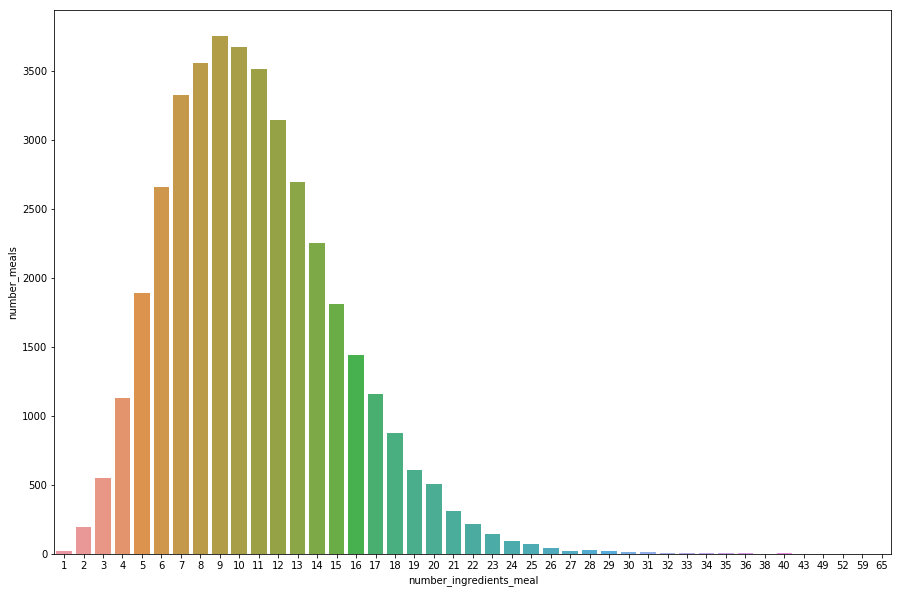

In [34]:
import seaborn as sb
f, ax = plt.subplots(figsize=(15,10))
sb.barplot(x='number_ingredients_meal',
            y='number_meals',
            data= (data.ingredients.map(lambda l: len(l))
                    .value_counts()
                    .sort_index()
                    .reset_index()
                    .rename(columns={'index':'number_ingredients_meal', 'ingredients':'number_meals'}))
            )

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['cuisine'])

LabelEncoder()

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
# Counting the total number of ingredients being used across all the food
vec = CountVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')], lowercase=False)
counts = vec.fit_transform(data['ingredients2']) 
count=dict(zip(vec.get_feature_names(), counts.sum(axis=0).tolist()[0]))
count=pd.DataFrame(list(count.items()),columns=['Ingredient','Count'])

In [38]:
count.sample(n=10) # to take a look at the sample

,Ingredient,Count
991,bloodsausage,1
1397,catfish,19
6372,veggies,27
3249,heartsofromaine,15
3946,maitakemushrooms,3
5031,reduced-fatsourcream,105
5217,rosewater,25
3504,kashmirichile,2
6069,thousandislanddressing,3
4106,mincedleansteak,1


In [39]:
#To see the total number of the ingredients provided
total_ingredients = count['Ingredient'].count
total_ingredients

<bound method Series.count of 0                                        
1             (10oz.)frozenchoppedspinach
2                  (14.5oz.)dicedtomatoes
3           (14oz.)sweetenedcondensedmilk
4                     (15oz.)refriedbeans
5                        (oz.)tomatopaste
6                        (oz.)tomatosauce
7                     1%low-fatbuttermilk
8                  1%low-fatchocolatemilk
9                  1%low-fatcottagecheese
10                          1%low-fatmilk
11                             1inchthick
12                 2%low-fatcottagecheese
13                   2%lowfatcheddarchees
14                    2%lowfatgreekyogurt
15         2%milkshreddedmozzarellacheese
16                      2%reduced-fatmilk
17                      21/2to3lb.chicken
18              25%lesssodiumchickenbroth
19             33%lesssodiumcookeddeliham
20                 33%lesssodiumcookedham
21                       33%lesssodiumham
22      33%lesssodiumsmokedfullycookedham
23  

In [40]:
top_20 = count.sort_values('Count',ascending = False)[:20]
top_20

,Ingredient,Count
5285,salt,18049
4338,onions,7972
4324,oliveoil,7972
6415,water,7457
2876,garlic,7380
5866,sugar,6434
2882,garliccloves,6237
1216,butter,4848
3124,groundblackpepper,4785
552,all-purposeflour,4632


In [41]:
type(top_20)

pandas.core.frame.DataFrame

In [42]:
picture = [go.Bar(
            y=top_20['Ingredient'],
            x=top_20['Count'],
            orientation = 'h',
    marker = dict(color = random_colours(20))
    )]

layout = go.Layout(
    title= 'Top 20 Ingredients in the Datasets',
)

fig = go.Figure(data=picture, layout=layout)
py.iplot(fig, filename='bar')

## Let's Find The Most Unique Ingredients From Each Cuisine

In [43]:
allingredients = [] # this list stores all the ingredients in all recipes (with duplicates)
for item in data['ingredients']:
    for ingr in item:
        allingredients.append(ingr) 

In [44]:
allingredients = list(set(allingredients))

In [45]:
from collections import Counter
def cuisine_unique(cuisine,number_ingredient, allingredients):
    other_ingr = []
    for item in data[data.cuisine != cuisine]['ingredients']:
        for ingr in item:
            other_ingr.append(ingr)
    other_ingr = list(set(other_ingr))
    
    specific_ingr = [unique_one for unique_one in allingredients if unique_one not in other_ingr]
    
    mycounter = Counter()
    
    for item in data[data.cuisine == cuisine]['ingredients']:
        for ingr in item:
            mycounter[ingr] += 1
    save = list(specific_ingr)
    
    for word in list(mycounter):
        if word not in save:
            del mycounter[word]
    
    cuisinespec = pd.DataFrame(mycounter.most_common(number_ingredient), columns = ['ingredient','count'])
    
    return cuisinespec

## Let's Find The Most Unique Ingredients From Specific Cuisine

In [84]:
cui = input("Please enter the cuisine you want to search for: ")
number = int (input("Please enter the number of unique ingredients: "))
cui = cui.lower()
new_df = cuisine_unique(cui,number, allingredients)
new_df

Please enter the cuisine you want to search for: greek
Please enter the number of unique ingredients: 5


,ingredient,count
0,ouzo,10
1,kefalotyri,9
2,greek-style vinaigrette,5
3,pita loaves,5
4,sliced kalamata olives,4


From this observation, you can find the unique ingridients from each cuisine.
In this case, we take Italian as an example, and we can get the information that gnocchi is one of the unique ingridients that comes from Italian cuisine.

In [85]:
trace = go.Bar(
            x=new_df['count'],
            y= new_df['ingredient'],
            orientation = 'h',marker = dict(color = random_colours(number),
))
layout = go.Layout(
    xaxis = dict(title= 'Count of different unique ingredients', ),
    title= 'Number of unique ingredients used in a given cuisine', titlefont = dict(size = 20),
    width=800, height=500, 
)
unique_data = [trace]
fig = go.Figure(data=unique_data, layout=layout)
py.iplot(fig, filename='horizontal-bar1')

# Now let's try to predict the cuisine based on the ingredients given.

### For this part, we will use several models to predict the cuisine, and will determine which one is the best models.
 1. Linear SVC
 2. Logistic Regression
 3. Random Forest Classifier

In [47]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['ingredients2'].values)

In [48]:
X

<39774x6802 sparse matrix of type '<class 'numpy.int64'>'
	with 441066 stored elements in Compressed Sparse Row format>

In [49]:
X_test = vectorizer.transform(data['ingredients2'].values)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, data['cuisine'], test_size=0.25, random_state=42)

In [51]:
Y_train = le.transform(Y_train)

In [52]:
Y_test = le.transform(Y_test)

# Linear SVC

In [53]:
#Using Linear SVC
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, Y_train) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [54]:
clf.score(X_test, Y_test)

0.7649839098954143

In [55]:
test_data = pd.read_json('test.json')

In [56]:
test_data.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [57]:
test_data.shape

(9944, 2)

In [58]:
test_data['ingredients2'] = test_data['ingredients'].apply(lambda x: [y.replace(' ','') for y in x])
test_data['ingredients2'] = test_data['ingredients2'].apply(lambda x: ",".join(x))

In [59]:
test_data.head()

,id,ingredients,ingredients2
0,18009,"[baking powder, eggs, all-purpose flour, raisi...","bakingpowder,eggs,all-purposeflour,raisins,mil..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...","sugar,eggyolks,cornstarch,creamoftartar,banana..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil...","sausagelinks,fennelbulb,fronds,oliveoil,cubanp..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,...","meatcuts,filepowder,smokedsausage,okra,shrimp,..."
4,35687,"[ground black pepper, salt, sausage casings, l...","groundblackpepper,salt,sausagecasings,leeks,pa..."


In [60]:
listnew = []
listnew.append(test_data['ingredients2'][1])
listnew

['sugar,eggyolks,cornstarch,creamoftartar,bananas,vanillawafers,milk,vanillaextract,toastedpecans,eggwhites,lightrum']

In [61]:
listnew = np.asarray(listnew, dtype = object)
userinput = vectorizer.transform(listnew)
y_pred = clf.predict(userinput)
Country = le.inverse_transform(y_pred)[0]

In [62]:
Country

'southern_us'

In [63]:
data['ingredients2'][0]

'romainelettuce,blackolives,grapetomatoes,garlic,pepper,purpleonion,seasoning,garbanzobeans,fetacheesecrumbles'

In [160]:
userpreference = []
count = int(input("Enter number of ingredients: "))
ingredient = input("Enter ingredients:")
for i in range(count - 1):
    ingredient = ingredient + ', ' + input("Enter ingredients:")
userpreference.append(ingredient)

Enter number of ingredients: 9
Enter ingredients:romainlettuce
Enter ingredients:blackolives
Enter ingredients:grapetomatoes
Enter ingredients:garlic
Enter ingredients:pepper
Enter ingredients:purpleonion
Enter ingredients:seasoning
Enter ingredients:garbanzobeans
Enter ingredients:fetacheesecrumbles


In [161]:
userpreference

['romainlettuce, blackolives, grapetomatoes, garlic, pepper, purpleonion, seasoning, garbanzobeans, fetacheesecrumbles']

In [162]:
userpreference = np.asarray(userpreference, dtype = object)

In [163]:
userinput = vectorizer.transform(userpreference)

In [164]:
userinput

<1x6802 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [165]:
y_pred = clf.predict(userinput)
y_pred

array([6])

In [166]:
Country = le.inverse_transform(y_pred)[0]

In [168]:
print("This ingredients come from",Country)

This ingredients come from greek


Text(0.5, 64.59999999999997, 'Predicted label')

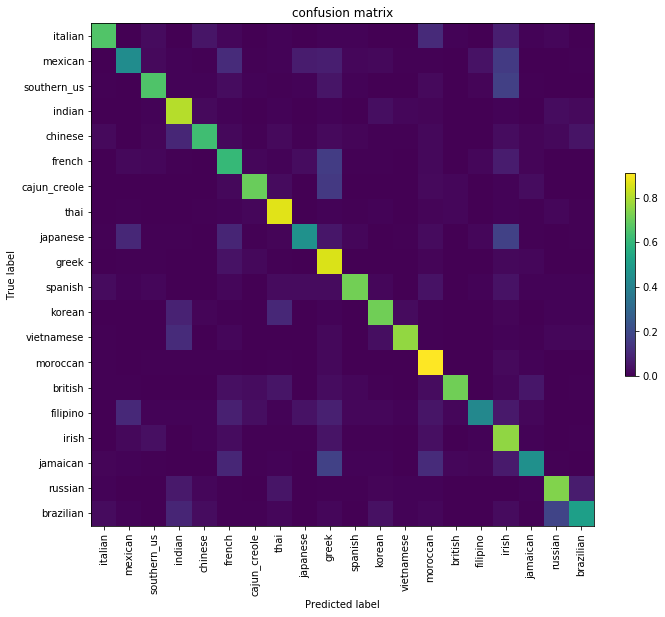

In [107]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

cm = confusion_matrix(Y_test, clf.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("Confusion matrix of the Prediction")
plt.colorbar(shrink=0.3)
cuisines = data['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Random Forest Classifier

In [15]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2.fit(X_train, Y_train)

C:\Users\jasonjonathan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
clf2.score(X_test, Y_test)

0.660699919549477

# Logistic Regression

In [64]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression()
clf3.fit(X_train, Y_train)

C:\Users\jasonjonathan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\jasonjonathan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [65]:
clf3.score(X_test, Y_test)

0.7809734513274337

In [66]:
listnew = []
listnew.append(test_data['ingredients2'][1])
listnew

['sugar,eggyolks,cornstarch,creamoftartar,bananas,vanillawafers,milk,vanillaextract,toastedpecans,eggwhites,lightrum']

In [69]:
listnew = np.asarray(listnew, dtype = object)
userinput = vectorizer.transform(listnew)
y_pred = clf3.predict(userinput)
Country = le.inverse_transform(y_pred)[0]

In [70]:
Country

'southern_us'

### Based on our observation exploring the datasets, some cuisine have unique ingredient, 
### so it is easy to differentiate, however some only use the common ingredient so it is quite
### hard to differentiate.



### We use basic parameter of all the model that we use here. We do not tune in the parameter
### of the model.


### Based on the result, logistic regression among the model that we use.